In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from analysis_toolkit import setup_latex, util
from analysis_toolkit import definitions as defs

summary = pd.read_csv('summary.csv', dtype=defs.COLUMNS)
setup_latex()

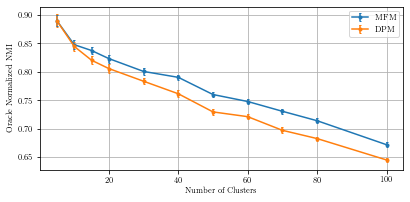

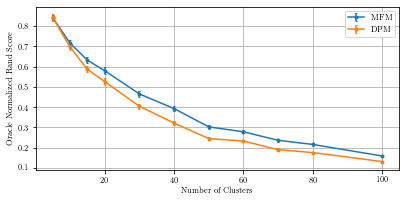

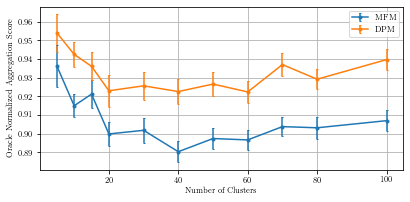

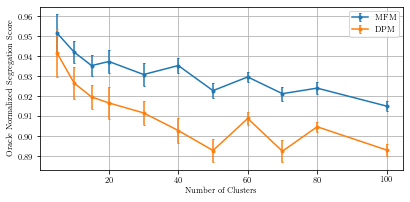

In [73]:
def plot_scaling(ax, key):

    for method, desc in defs.METHODS_P3.items():
        data = [
            util.oracle_ratio(summary, method=method, key=key, **t)
            for t in defs.TESTS_P3
        ]
        
        mean = [np.mean(d) for d in data]
        sem = [stats.sem(d) for d in data]
        dim = [t['k'] for t in defs.TESTS_P3]

        ax.errorbar(dim, mean, yerr=sem, fmt='.-', capsize=1, label=desc)
        
    ax.set_ylabel("Oracle Normalized " + defs.SCORES[key])
    ax.set_xlabel("Number of Clusters")
    
    ax.grid()
    ax.legend()


for score in ['nmi', 'rand', 'aggregation', 'segregation']:
    fig, ax = plt.subplots(1, 1, figsize=(6.5, 3))
    plot_scaling(ax, score)
    plt.savefig('./plots/p3_scale/{}.pdf'.format(score))


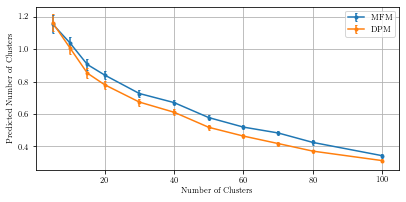

In [72]:
def plot_scaling_nc(ax):

    for method, desc in defs.METHODS_P3.items():

        df = [util.filter(summary, method=method, **t) for t in defs.TESTS_P3]
        data = [list(d['num_clusters'] / d['k']) for d in df]

        mean = [np.mean(d) for d in data]
        sem = [stats.sem(d) * 2 for d in data]

        dim = [t['k'] for t in defs.TESTS_P3]

        ax.errorbar(dim, mean, yerr=sem, fmt='.-', capsize=1, label=desc)

    ax.set_ylabel("Predicted Number of Clusters")
    ax.set_xlabel("Number of Clusters")
    ax.grid()
    ax.legend()


fig, ax = plt.subplots(1, 1, figsize=(6.5, 3))
plot_scaling_nc(ax)
plt.savefig('./plots/p3_scale/num_clusters.pdf')
